# 🇧🇯 Benin Solar Data - Exploratory Data Analysis (EDA)
Prepared as part of the 10 Academy Challenge Task 2


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('../data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics & Missing Values

In [5]:
# Summary statistics
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [6]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Comments    525600
dtype: int64

In [7]:
# Columns with >5% missing
threshold = 0.05 * len(df)
missing[missing > threshold]

Comments    525600
dtype: int64

## Outlier Detection & Cleaning

In [9]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Outliers found: {outliers.sum()}")
df_cleaned = df[~outliers]

# Impute missing with median
df_cleaned[columns_to_check] = df_cleaned[columns_to_check].fillna(df_cleaned[columns_to_check].median())

# Save cleaned file
df_cleaned.to_csv('../data/benin_clean.csv', index=False)

Outliers found: 7740


## Time Series Analysis

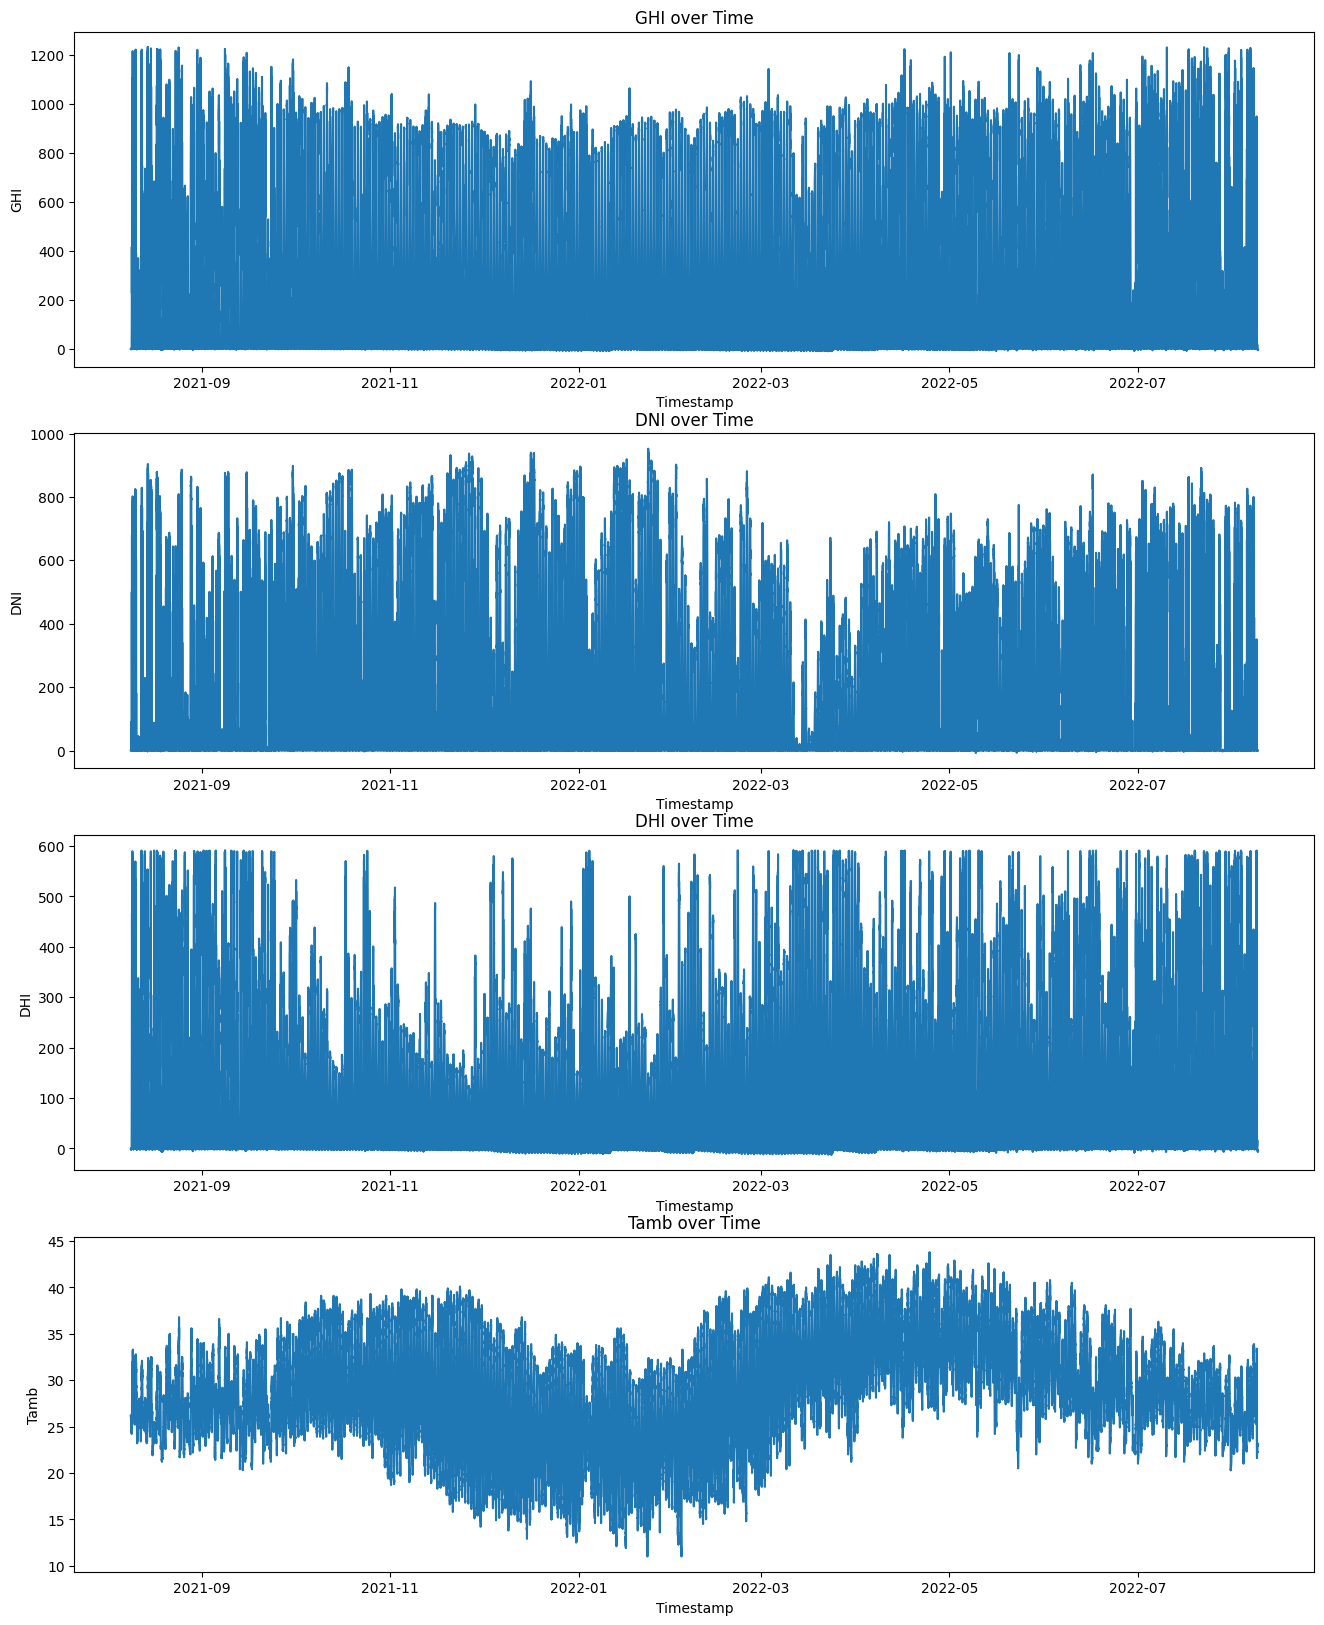

In [10]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
    sns.lineplot(x='Timestamp', y=col, data=df_cleaned, ax=axs[i])
    axs[i].set_title(f'{col} over Time')

<Axes: title={'center': 'Hourly Trends'}, xlabel='hour'>

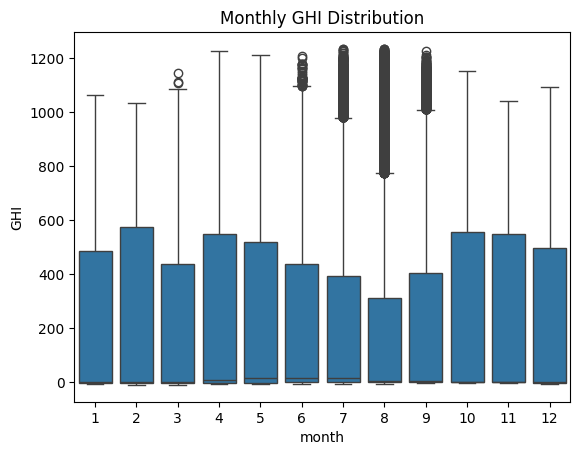

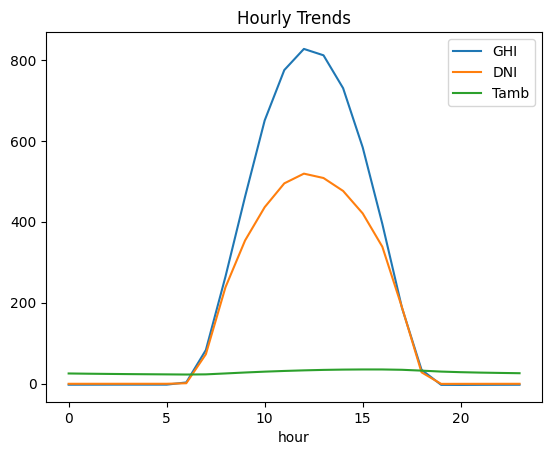

In [11]:
df_cleaned['month'] = df_cleaned['Timestamp'].dt.month
df_cleaned['hour'] = df_cleaned['Timestamp'].dt.hour

sns.boxplot(x='month', y='GHI', data=df_cleaned)
plt.title("Monthly GHI Distribution")
df_cleaned.groupby('hour')[['GHI', 'DNI', 'Tamb']].mean().plot(title="Hourly Trends")

## Cleaning Impact

<Axes: title={'center': 'Effect of Cleaning on ModA & ModB'}, xlabel='Cleaning'>

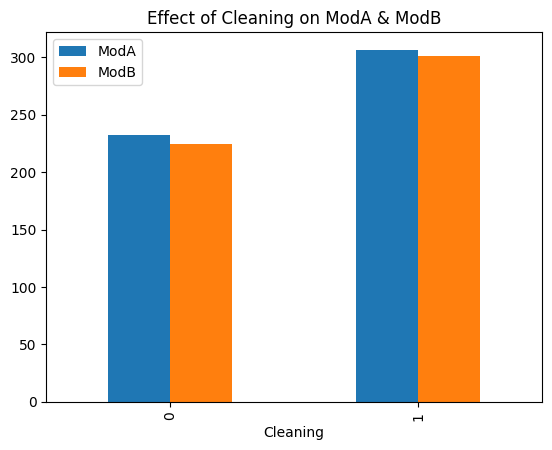

In [12]:
df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title="Effect of Cleaning on ModA & ModB")

## Correlation & Relationship Analysis

<Axes: >

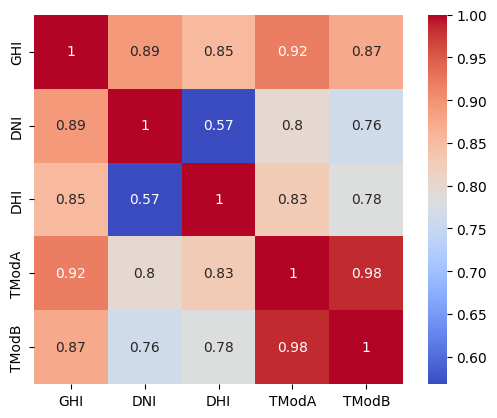

In [13]:
corr = df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

<Axes: xlabel='WS', ylabel='GHI'>

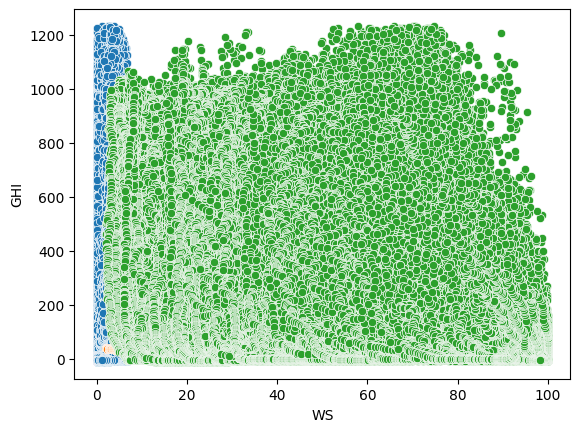

In [14]:
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
sns.scatterplot(x='RH', y='GHI', data=df_cleaned)

## Wind & Distribution Analysis

Text(0.5, 1.0, 'Wind Speed Distribution')

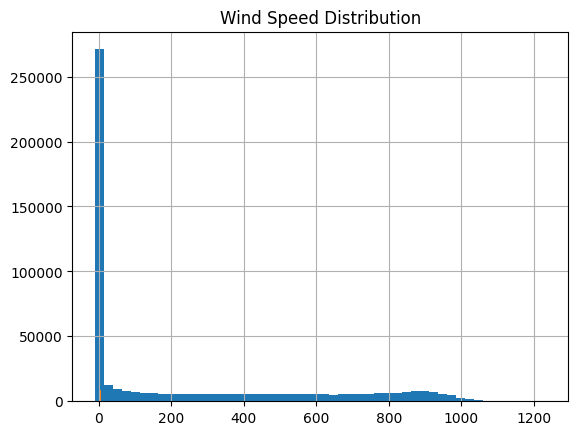

In [15]:
# Histograms
df_cleaned['GHI'].hist(bins=50)
plt.title("GHI Distribution")

df_cleaned['WS'].hist(bins=50)
plt.title("Wind Speed Distribution")

## Temperature & Humidity Analysis

Text(0.5, 1.0, 'Relative Humidity vs Ambient Temperature')

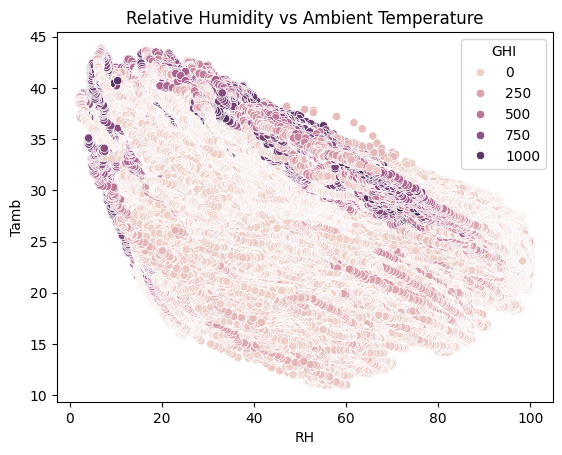

In [16]:
sns.scatterplot(x='RH', y='Tamb', hue='GHI', data=df_cleaned)
plt.title("Relative Humidity vs Ambient Temperature")

## Bubble Chart

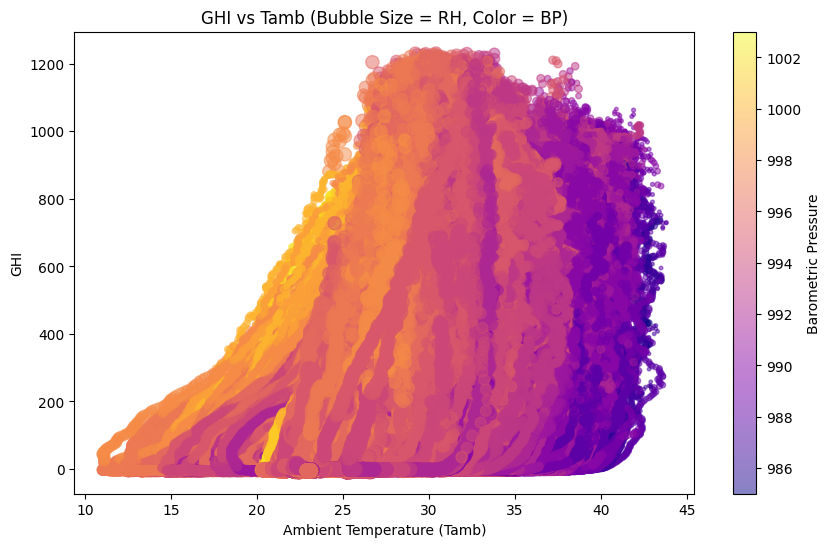

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cleaned['Tamb'], df_cleaned['GHI'],
    s=df_cleaned['RH'], alpha=0.5,
    c=df_cleaned['BP'], cmap='plasma'
)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (Bubble Size = RH, Color = BP)')
plt.colorbar(label='Barometric Pressure')